In [1]:
import os
os.chdir(globals()['_dh'][0])
os.chdir("..")

In [2]:
import numpy as np
import pandas as pd
from history import load_price
import ta

import matplotlib.pyplot as plt

from scipy import interpolate

can't import config from config file


In [3]:
prices = load_price()[-500:]
prices.columns

Index(['timestamp', 'bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open',
       'ask_high', 'ask_low', 'ask_close', 'volume'],
      dtype='object')

In [4]:


# simple moving average
prices["SMA"] = ta.trend.SMAIndicator(prices["bid_close"], 
                                      window = 14).sma_indicator()


# difference between smoothed time deltas
adx = ta.trend.ADXIndicator(prices["bid_high"], prices["bid_low"], prices["bid_close"], window = 14)
prices["ADX"] = adx.adx()
prices["ADX_NEG"] = adx.adx_neg()
prices["ADX_POS"] = adx.adx_pos()


# indicator for when trends are likely to change
aroon = ta.trend.AroonIndicator(prices["bid_close"], window = 25)
prices["AROON"] = aroon.aroon_indicator()
prices["AROON_UP"] = aroon.aroon_up()
prices["AROON_DOWN"] = aroon.aroon_down()


# commodity channel index
# difference between price change and average price change
# - the range (starting from 100) identifies overbuying or overselling (but not garantued).
# - OBV and ADL can add additional value
prices["CCI"] = ta.trend.CCIIndicator(prices["bid_high"], prices["bid_low"], prices["bid_close"], 
                                      window = 20).cci()


# removes trends
prices["DPO"] = ta.trend.DPOIndicator(prices["bid_close"], 
                                      window = 20).dpo()


# exponential moving average
prices["EMA"] = ta.trend.EMAIndicator(prices["bid_close"], 
                                      window = 14).ema_indicator()


# ichimoku (momentum indicator)
# - convergence_line = 9 day (H + L)/2
# - base_line = 26 day (H + L) / 2
# - leading_span_a = (base_lin + convergence_line) / 2
# when the difference between moku a and moku b (cloud) is:
# - below the price = upward trend
# - above the price = downward trend
prices["ICHIMOKU_BASE"] = ta.trend.IchimokuIndicator(prices["bid_high"], prices["bid_low"], 9, 26, 52).ichimoku_base_line()
prices["ICHIMOKU_CONV"] = ta.trend.IchimokuIndicator(prices["bid_high"], prices["bid_low"], 9, 26, 52).ichimoku_conversion_line()
prices["ICHIMOKU_A"] = ta.trend.IchimokuIndicator(prices["bid_high"], prices["bid_low"], 9, 26, 52).ichimoku_a()
prices["ICHIMOKU_B"] = ta.trend.IchimokuIndicator(prices["bid_high"], prices["bid_low"], 9, 26, 52).ichimoku_b()


# know shure thing (momentum indicator)
# - more influenced by longer and more dominant timespans
# - captures primary swings
# - simply: a weighted sum of N rate-of-change smoothed by N moving-averages (window[n] = window_size)
kst = ta.trend.KSTIndicator(prices["bid_close"],
                                     roc1 = 10, roc2 = 15, roc3 = 20, roc4 = 30,
                                     window1 = 10, window2 = 20, window3 = 10, window4 = 15,
                                     nsig = 9)
prices["KST"] = kst.kst()
prices["KST_SIG"] = kst.kst_sig()


# moving average convergence divergence (momentum indicator)
prices["MACD"] = ta.trend.MACD(prices["bid_close"], 
                               window_slow = 26, window_fast = 12, window_sign = 9).macd()
prices["MACD_SIG"] = ta.trend.MACD(prices["bid_close"], 
                                   window_slow = 26, window_fast = 12, window_sign = 9).macd_signal()


# Mass index used to identify trend reversals based on range expancion
# - it identifies range bulges that can forshadow a trend reversal
prices["MI"] = ta.trend.MassIndex(prices["bid_high"], prices["bid_low"],
                                 window_slow = 9, window_fast = 25).mass_index()


# parabolic stop and reverse
# trails behind the trend (above downward trends and below upward trends)
# the step -> max step defines how quickly and how far the indicator approaches the price
prices["PSAR"] = ta.trend.PSARIndicator(prices["bid_high"], prices["bid_low"], prices["bid_close"],
                                       step = 0.02, max_step = 0.2).psar()


# Schaff Trend Cycle
# invented for currency
prices["STC"] = ta.trend.STCIndicator(prices["bid_close"], window_slow = 50,
                                      window_fast = 23, cycle = 10, smooth1 = 3, smooth2 = 3).stc()


# percentage rate-of-change for a tripple smoothed EMA (i.e. the EMA of an EMA of an EMA)
# similar to MACD
prices["TRIX"] = ta.trend.TRIXIndicator(prices["bid_close"], 
                                        window = 15).trix()


# Vortex indicator
# two oscillators that capture positive and negative trend momentum
# key is if they cross
vi = ta.trend.VortexIndicator(prices["bid_high"], prices["bid_low"], prices["bid_close"], 
                                        window = 14)
prices["VI_NEG"] = vi.vortex_indicator_neg()
prices["VI_POS"] = vi.vortex_indicator_pos()



c:\users\noone\miniconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
c:\users\noone\miniconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


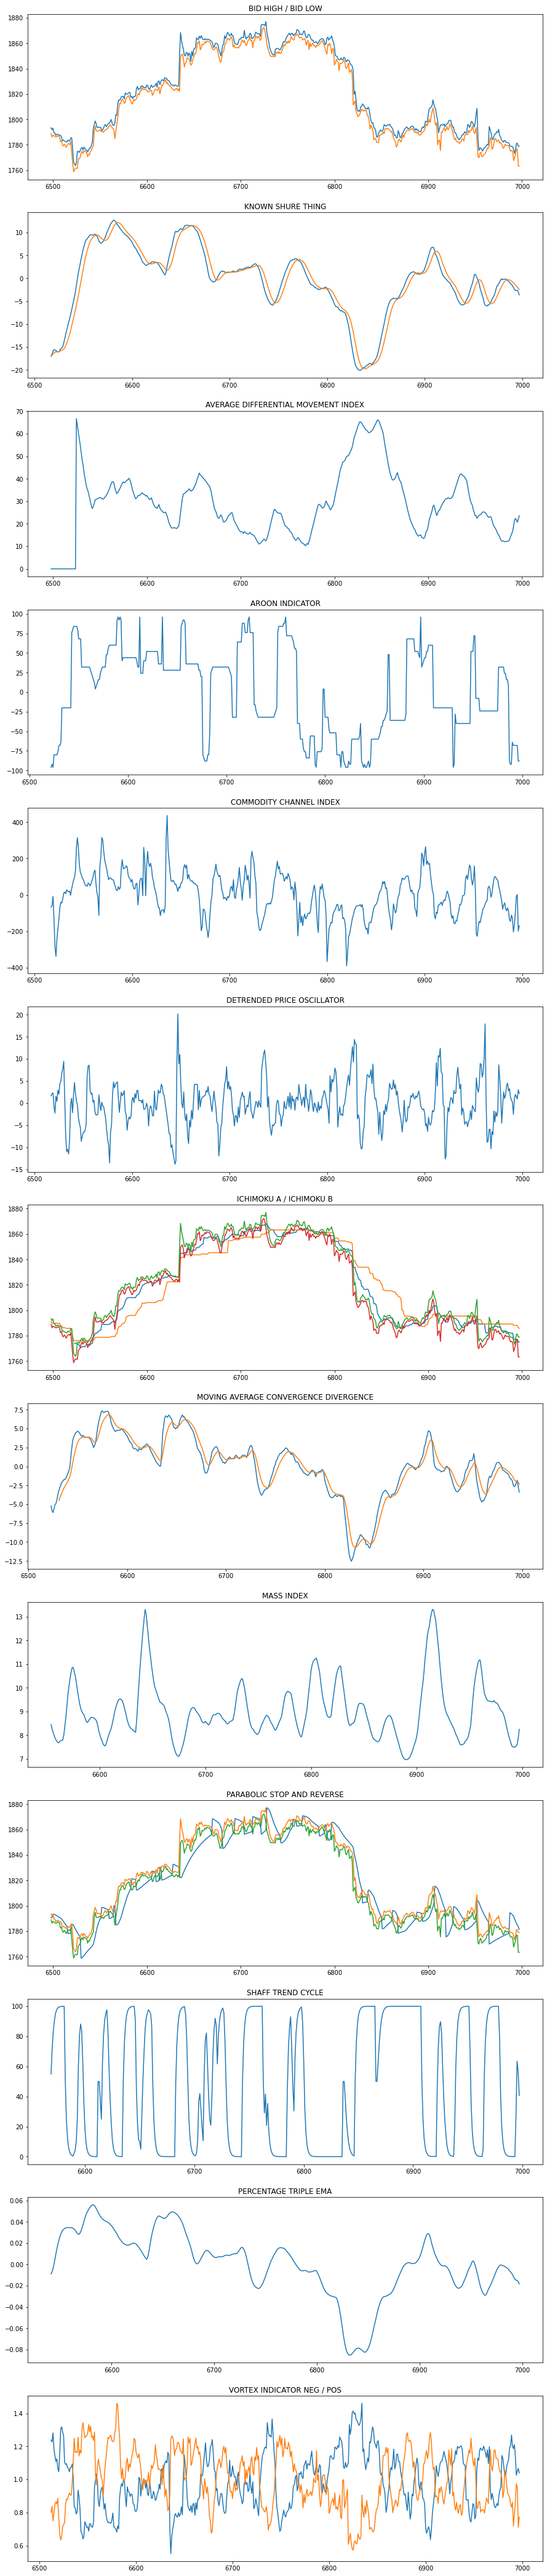

In [5]:
i = 13
fig = plt.figure(figsize=(15,20))
ax1 = plt.subplot(i,1,1)
ax2 = plt.subplot(i,1,2)
ax3 = plt.subplot(i,1,3)
ax4 = plt.subplot(i,1,4)
ax5 = plt.subplot(i,1,5)
ax6 = plt.subplot(i,1,6)
ax7 = plt.subplot(i,1,7)
ax8 = plt.subplot(i,1,8)
ax9 = plt.subplot(i,1,9)
ax10 = plt.subplot(i,1,10)
ax11 = plt.subplot(i,1,11)
ax12 = plt.subplot(i,1,12)
ax13 = plt.subplot(i,1,13)

plt.subplots_adjust(top = 3)




ax1.plot(prices["bid_high"])
ax1.plot(prices["bid_low"])
ax1.set_title("BID HIGH / BID LOW")

ax2.plot(prices["KST"])
ax2.plot(prices["KST_SIG"])
ax2.set_title("KNOWN SHURE THING")

ax3.plot(prices["ADX"])
# ax3.plot(prices["ADX_NEG"])
# ax3.plot(prices["ADX_POS"])
ax3.set_title("AVERAGE DIFFERENTIAL MOVEMENT INDEX")

ax4.plot(prices["AROON"])
# ax4.plot(prices["AROON_DOWN"])
# ax4.plot(prices["AROON_UP"])
ax4.set_title("AROON INDICATOR")

ax5.plot(prices["CCI"])
ax5.set_title("COMMODITY CHANNEL INDEX")

ax6.plot(prices["DPO"])
ax6.set_title("DETRENDED PRICE OSCILLATOR")

ax7.plot(prices["ICHIMOKU_A"])
ax7.plot(prices["ICHIMOKU_B"])
ax7.plot(prices["bid_high"])
ax7.plot(prices["bid_low"])
ax7.set_title("ICHIMOKU A / ICHIMOKU B")

ax8.plot(prices["MACD"])
ax8.plot(prices["MACD_SIG"])
ax8.set_title("MOVING AVERAGE CONVERGENCE DIVERGENCE")

ax9.plot(prices["MI"])
ax9.set_title("MASS INDEX")

ax10.plot(prices["PSAR"])
ax10.plot(prices["bid_high"])
ax10.plot(prices["bid_low"])
ax10.set_title("PARABOLIC STOP AND REVERSE")

ax11.plot(prices["STC"])
ax11.set_title("SHAFF TREND CYCLE")

ax12.plot(prices["TRIX"])
ax12.set_title("PERCENTAGE TRIPLE EMA")

ax13.plot(prices["VI_NEG"])
ax13.plot(prices["VI_POS"])
ax13.set_title("VORTEX INDICATOR NEG / POS")


plt.show()

In [9]:

# Average true range
# true range = absolute distance between
# - previous close and current high (upward)
# - previous close and current low (downward)
# ATR = mean true range for window
prices["ATR"] = ta.volatility.AverageTrueRange(prices["bid_high"], prices["bid_low"], prices["bid_close"], 
                                               window = 14).average_true_range()


# bollinger bands
# SMA and SMA +/- 2x 20-day std-dev
bb = ta.volatility.BollingerBands(prices["bid_close"],
                                            window = 20, window_dev = 2)
prices["BB_HIGH"] = bb.bollinger_hband()
prices["BB_LOW"] = bb.bollinger_lband()


# Donchian channel
# max high over window for high 
# min low over window for low
dc = ta.volatility.DonchianChannel(prices["bid_high"], prices["bid_low"], prices["bid_close"],
                                   window = 20, offset = 0)
prices["DC_HIGH"] = dc.donchian_channel_hband()
prices["DC_LOW"] = dc.donchian_channel_lband()


# keltner channel
# set to two ATR values relative to a 20-day EMA
kel = ta.volatility.KeltnerChannel(prices["bid_high"], prices["bid_low"], prices["bid_close"],
                                   window = 20, window_atr = 10)
prices["KEL_HIGH"] = kel.keltner_channel_hband()
prices["KEL_LOW"] = kel.keltner_channel_lband()


# ulcer index
# directly correlated to the drawdown of a price from previous highs
# works well with weekly data
prices["ULCER"] = ta.volatility.UlcerIndex(prices["bid_close"], window = 14).ulcer_index()


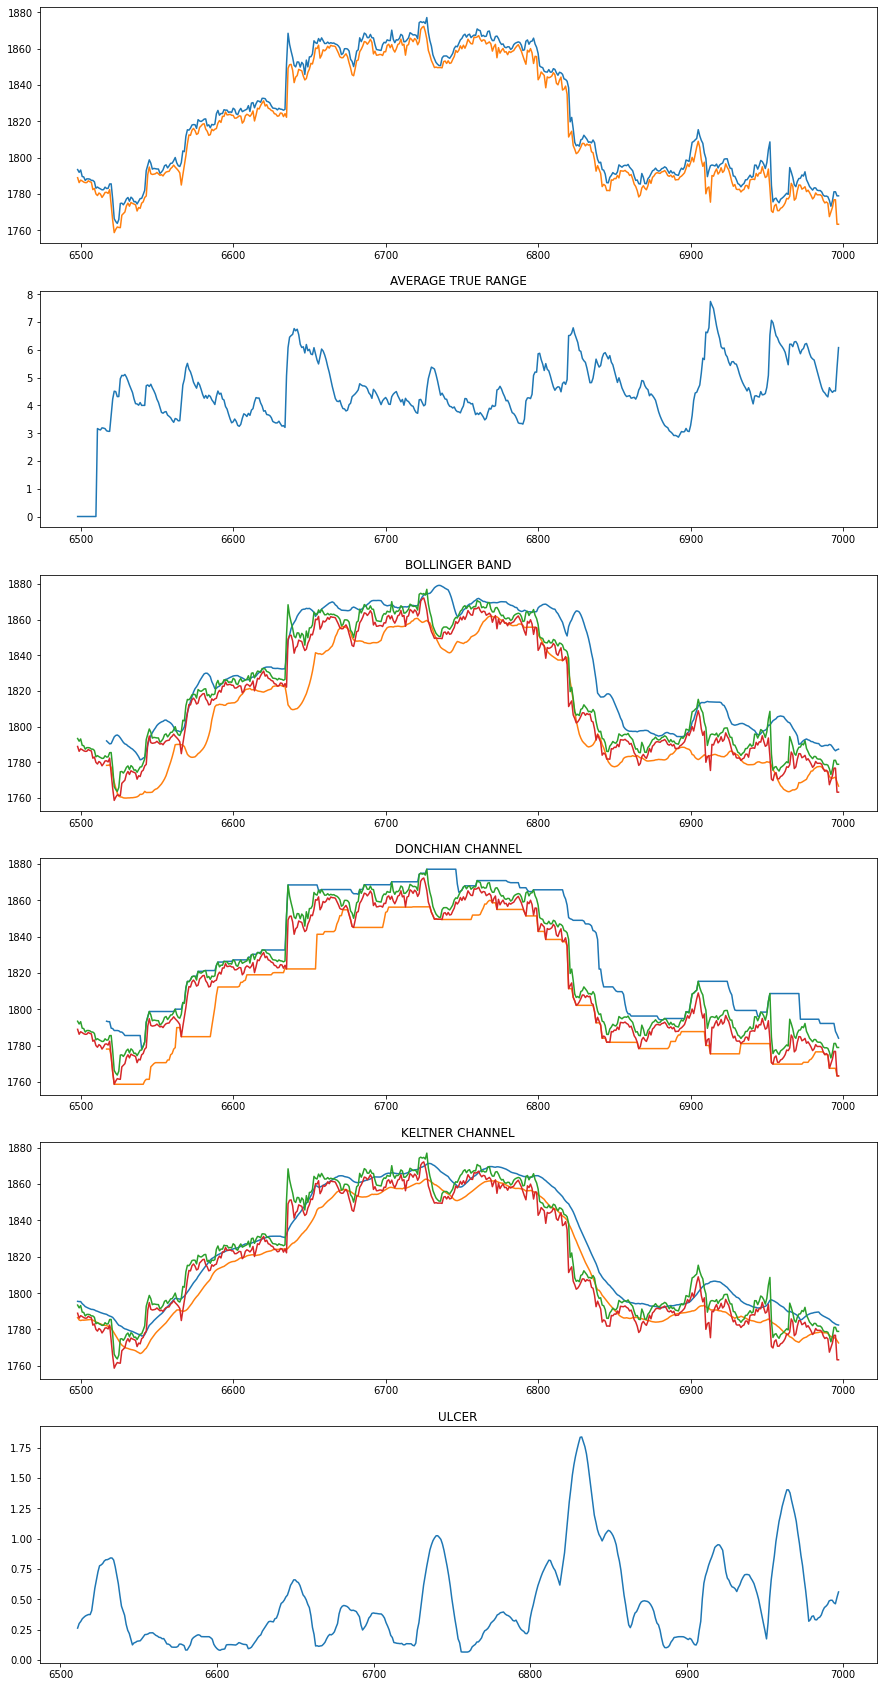

In [10]:
i = 6
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot(i,1,1)
ax2 = plt.subplot(i,1,2)
ax3 = plt.subplot(i,1,3)
ax4 = plt.subplot(i,1,4)
ax5 = plt.subplot(i,1,5)
ax6 = plt.subplot(i,1,6)

plt.subplots_adjust(top = 3)


ax1.plot(prices["bid_high"])
ax1.plot(prices["bid_low"])

ax2.plot(prices["ATR"])
ax2.set_title("AVERAGE TRUE RANGE")

ax3.plot(prices["BB_HIGH"])
ax3.plot(prices["BB_LOW"])
ax3.plot(prices["bid_high"])
ax3.plot(prices["bid_low"])
ax3.set_title("BOLLINGER BAND")

ax4.plot(prices["DC_HIGH"])
ax4.plot(prices["DC_LOW"])
ax4.plot(prices["bid_high"])
ax4.plot(prices["bid_low"])
ax4.set_title("DONCHIAN CHANNEL")

ax5.plot(prices["KEL_HIGH"])
ax5.plot(prices["KEL_LOW"])
ax5.plot(prices["bid_high"])
ax5.plot(prices["bid_low"])
ax5.set_title("KELTNER CHANNEL")

ax6.plot(prices["ULCER"])
ax6.set_title("ULCER")

plt.show()

In [4]:
# def get_pitchfork_median_line(p1, p2, p3, line_length):
    
#     median_line = p1 + line_length * (((p2 + p3) / 2.) - p1)
#     resistance_line = p2 + line_length * (((p2 + p3) / 2.) - p1)
#     support_line = p3 + line_length * (((p2 + p3) / 2.) - p1)
    
#     return p1, p2, p3, median_line, resistance_line, support_line

# def find_pitchfork(sequence, line_length = 1):

#     p3 = [sequence.argmax(), sequence[sequence.argmax()]]
#     p2 = [sequence[:p3[0]].argmin(), sequence[:p3[0]][sequence[:p3[0]].argmin()]]
#     p1 = [sequence[:p2[0]].argmax(), sequence[:p2[0]][sequence[:p2[0]].argmax()]]

#     return get_pitchfork_median_line(np.array(p1), np.array(p2), np.array(p3), line_length)

In [6]:
# fig = plt.figure(figsize=(10, 5))
# ax = plt.subplot()

# from_ = 6485
# to_   = 6700

# xx = prices["bid_mean"][from_:to_]
# x = np.array(xx)

# ax.scatter(xx.index, x)
# ax.scatter(xx.index, x)

# fork = find_pitchfork(x, 3)
# print(fork)
# fork_med_x, fork_med_y = np.array([from_ + fork[0][0], from_ + fork[3][0]]), np.array([fork[0][1], fork[3][1]])
# fork_res_x, fork_res_y = np.array([from_ + fork[1][0], from_ + fork[4][0]]), np.array([fork[1][1], fork[4][1]])
# fork_sup_x, fork_sup_y = np.array([from_ + fork[2][0], from_ + fork[5][0]]), np.array([fork[2][1], fork[5][1]])
# conn_x, conn_y = np.array([from_ + fork[1][0], from_ + fork[2][0]]), np.array([fork[1][1], fork[2][1]])

# ax.plot(fork_med_x, fork_med_y, linewidth=3, c="Red")
# ax.plot(fork_res_x, fork_res_y, linewidth=3, c="Blue")
# ax.plot(fork_sup_x, fork_sup_y, linewidth=3, c="Green")
# ax.plot(conn_x, conn_y, linewidth=3, c="Black")

# # ax.scatter(fork[0][0] + 1000, fork[0][1])
# # ax.scatter(fork[1][0] + 1000, fork[1][1])
# # ax.scatter(fork[1][0] + 1000, fork[1][1])

# plt.show()

In [12]:
def get_pitchfork_median_line(p1, p2, p3, line_length):
    
    median_line = p1 + line_length * (((p2 + p3) / 2.) - p1)
    resistance_line = p2 + line_length * (((p2 + p3) / 2.) - p1)
    support_line = p3 + line_length * (((p2 + p3) / 2.) - p1)
    
    return p1, p2, p3, median_line, resistance_line, support_line

def find_pitchfork_high_low(high_seq, low_seq, line_length = 1):

    p3 = [high_seq.argmax(), high[high_seq.argmax()]]
    p2 = [low_seq[:p3[0]].argmin(), low_seq[:p3[0]][low_seq[:p3[0]].argmin()]]
    p1 = [high_seq[:p2[0]].argmax(), high_seq[:p2[0]][high_seq[:p2[0]].argmax()]]

    return get_pitchfork_median_line(np.array(p1), np.array(p2), np.array(p3), line_length)

def find_pitchfork_high_low(high, low, line_length = 1):

    p3 = [high.argmax(), high[high.argmax()]]
    p2 = [low[:p3[0]].argmin(), low[:p3[0]][low[:p3[0]].argmin()]]
    p1 = [high[:p2[0]].argmax(), high[:p2[0]][high[:p2[0]].argmax()]]

    return get_pitchfork_median_line(np.array(p1), np.array(p2), np.array(p3), line_length)

def plot_fork(from_, to_):
    fig = plt.figure(figsize=(10, 5))
    ax = plt.subplot()

    #from_ = int(len(prices)/2.0) # 6485
    #to_   = len(prices) # 6700


    high_w = prices['bid_high'][from_:to_]
    low_w = prices['bid_low'][from_:to_]

    high = np.array(high_w)
    low = np.array(low_w)

    fork = find_pitchfork_high_low(high, low, 3)

    ax.scatter(high_w.index, high, s=1)
    ax.scatter(low_w.index, low, s=1)

    print(fork)

    fork_med_x, fork_med_y = np.array([from_ + fork[0][0], from_ + fork[3][0]]), np.array([fork[0][1], fork[3][1]])
    fork_res_x, fork_res_y = np.array([from_ + fork[1][0], from_ + fork[4][0]]), np.array([fork[1][1], fork[4][1]])
    fork_sup_x, fork_sup_y = np.array([from_ + fork[2][0], from_ + fork[5][0]]), np.array([fork[2][1], fork[5][1]])
    conn_x, conn_y = np.array([from_ + fork[1][0], from_ + fork[2][0]]), np.array([fork[1][1], fork[2][1]])

    ax.plot(fork_med_x, fork_med_y, linewidth=3, c="Red")
    ax.plot(fork_res_x, fork_res_y, linewidth=3, c="Blue")
    ax.plot(fork_sup_x, fork_sup_y, linewidth=3, c="Green")
    ax.plot(conn_x, conn_y, linewidth=3, c="Black")
    
    plt.show()
    return fork

In [1]:


from_ = int(len(prices)/2.0)
to_ = len(prices)

plot_fork(from_, to_)


NameError: name 'prices' is not defined